# 何恺明团队新作ResNext：Instagram图片预训练，挑战ImageNet新精度


8亿参数，刷新ImageNet纪录：何恺明团队开源最强ResNeXt预训练模型

resnext101_32x{4,8,16,32,48}d_wsl，其中wsl是弱监督学习。用Instagram上面的9.4亿张图做了 (弱监督) 预训练，用ImageNet做了微调。

ImageNet测试中，它的 (32×48d) 分类准确率达到85.4% (Top-1) ，打破了从前的纪录。

In [6]:
# 导入库
import torch 
import torch.nn as nn 
from torchvision import transforms

# 导入我们自定义的model
import models

# 加载模型


In [7]:
model_ft = models.resnext101_32x16d_wsl()

In [8]:
r = model_ft.eval() #预测问题，指定eval

# 那么我们来看下我们模型的参数

In [9]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

# 加载图片数据

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=995x995 at 0x7F316373C5F8>
(995, 995)


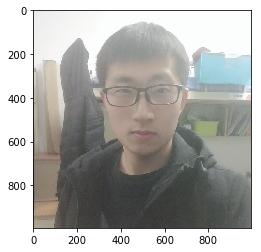

In [72]:
# file_name = 'images/yindu.jpg'
file_name = 'images/me.jpg'
from PIL import Image
input_image = Image.open(file_name)
print(input_image)
print(input_image.size)

# 数据可视化
import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(input_image)

In [73]:
# 图片数据预处理操作
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(file_name)
preprocess = transforms.Compose([
    transforms.Resize(256),
#     transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
print("input_tensor:", input_tensor)
print("input_tensor.shape,",input_tensor.shape)

input_tensor: tensor([[[ 1.8893,  1.8893,  1.8893,  ...,  2.1975,  2.1975,  2.1975],
         [ 1.8893,  1.8893,  1.8893,  ...,  2.1975,  2.1975,  2.1975],
         [ 1.8893,  1.8893,  1.8893,  ...,  2.1975,  2.1975,  2.1975],
         ...,
         [ 0.7933,  0.7933,  0.7933,  ..., -0.2684, -0.2513, -0.1999],
         [ 0.7933,  0.7933,  0.7933,  ..., -0.2684, -0.2171, -0.2171],
         [ 0.7933,  0.7933,  0.7933,  ..., -0.2856, -0.2513, -0.2342]],

        [[ 2.0609,  2.0609,  2.0609,  ...,  2.4111,  2.4111,  2.4111],
         [ 2.0609,  2.0609,  2.0609,  ...,  2.4111,  2.4111,  2.4111],
         [ 2.0609,  2.0609,  2.0609,  ...,  2.4111,  2.4111,  2.4111],
         ...,
         [ 0.8179,  0.8179,  0.8179,  ..., -0.0574, -0.0399, -0.0399],
         [ 0.8179,  0.8179,  0.8179,  ..., -0.0574, -0.0224, -0.0574],
         [ 0.8179,  0.8179,  0.8179,  ..., -0.0924, -0.0749, -0.0924]],

        [[ 2.2391,  2.2391,  2.2391,  ...,  2.6051,  2.6051,  2.6051],
         [ 2.2391,  2.2391,  2.

convert data format input_batch =   torch.Size([1, 3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([256, 256, 3])


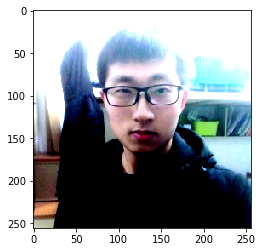

In [74]:
#  转化格式
# torch.Size([3, 224, 224])->torch.Size([1, 3, 224, 224])
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print('convert data format input_batch =  ',input_batch.shape)

# 数据预处理后，展示
import matplotlib.pyplot as plt
%matplotlib inline
print(input_tensor.shape)
image_tmp = input_tensor.permute(1,2,0)
print(image_tmp.shape)
image_tmp=torch.clamp(image_tmp,0,1)
plt.imshow(image_tmp)

# 模型在线预测



In [75]:
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    print("cuda exists")
    input_batch = input_batch.to('cuda')
    model_ft.to('cuda')
with torch.no_grad():
    output = model_ft(input_batch)

cuda exists


In [76]:
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])

tensor([-3.3356e-01,  4.5263e-01, -7.4635e-01, -9.9349e-01,  1.7435e-01,
         2.0499e+00, -9.2320e-01, -1.4311e-02, -4.0456e-03, -1.3521e+00,
        -6.6398e-01, -1.2229e+00, -2.5217e+00, -1.3044e+00, -1.7887e+00,
        -2.5412e+00, -2.4964e+00, -1.6400e+00, -3.8764e-01, -1.3439e+00,
        -7.9928e-01, -1.7550e+00, -9.9432e-01, -1.7085e+00, -1.1185e+00,
        -1.7988e+00, -2.0353e+00, -7.8898e-01, -1.8630e+00, -2.7600e-01,
        -1.3093e+00, -1.0085e+00, -9.0575e-01, -1.1154e+00, -1.8318e+00,
        -1.3273e+00, -5.5779e-01, -4.2865e-01, -7.9208e-01, -6.0543e-01,
        -2.0670e+00, -2.5538e-01, -2.4984e+00, -4.7146e-02, -9.6174e-01,
        -2.2602e+00, -1.3531e+00, -1.8177e+00, -6.8103e-01, -1.2753e+00,
        -1.1760e+00,  2.2675e-01,  3.0868e-01, -9.2880e-01, -2.2105e+00,
        -1.4436e+00,  6.5500e-01, -3.0389e+00, -1.2218e+00, -1.5939e+00,
        -9.4143e-01, -3.3493e-01, -8.8961e-01, -5.3105e-01, -1.0679e+00,
        -6.6065e-01, -1.9539e+00,  1.0820e-01, -1.3

In [77]:
print(output[0].shape)

torch.Size([1000])


In [78]:
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
print(torch.nn.functional.softmax(output[0], dim=0))


tensor([1.4889e-04, 3.2681e-04, 9.8534e-05, 7.6958e-05, 2.4742e-04, 1.6143e-03,
        8.2562e-05, 2.0488e-04, 2.0700e-04, 5.3768e-05, 1.0699e-04, 6.1185e-05,
        1.6695e-05, 5.6395e-05, 3.4747e-05, 1.6372e-05, 1.7122e-05, 4.0315e-05,
        1.4105e-04, 5.4210e-05, 9.3454e-05, 3.5937e-05, 7.6894e-05, 3.7647e-05,
        6.7916e-05, 3.4395e-05, 2.7153e-05, 9.4422e-05, 3.2256e-05, 1.5771e-04,
        5.6120e-05, 7.5813e-05, 8.4016e-05, 6.8127e-05, 3.3279e-05, 5.5117e-05,
        1.1898e-04, 1.3538e-04, 9.4129e-05, 1.1345e-04, 2.6306e-05, 1.6099e-04,
        1.7088e-05, 1.9827e-04, 7.9441e-05, 2.1683e-05, 5.3713e-05, 3.3752e-05,
        1.0518e-04, 5.8060e-05, 6.4122e-05, 2.6073e-04, 2.8300e-04, 8.2102e-05,
        2.2789e-05, 4.9064e-05, 4.0012e-04, 9.9532e-06, 6.1249e-05, 4.2216e-05,
        8.1071e-05, 1.4868e-04, 8.5383e-05, 1.2221e-04, 7.1441e-05, 1.0735e-04,
        2.9456e-05, 2.3159e-04, 5.1985e-05, 1.4390e-04, 6.1714e-04, 3.6617e-05,
        2.1782e-05, 5.5075e-05, 2.6329e-

# 获取最大可能性的类别

## 需要获取的数据： id－name 的标签 ，获取结果中最大可能性id号

In [79]:
result = torch.nn.functional.softmax(output[0], dim=0)
print(type(result))
# result -> list
v_list = result.cpu().numpy().tolist()

v_max = 0
idx = 0

for i, v in enumerate(v_list):
    if v>v_max:
        v_max = v 
        idx = i
print("v_max=", v_max)
print("idx=", idx)

<class 'torch.Tensor'>
v_max= 0.1815928965806961
idx= 608


In [80]:
import codecs
ImageNet_dict = {}

for line in codecs.open('data/ImageNet1k_label.txt', 'r'):
    line = line.strip() 
    _id = line.split(":")[0]
    _name = line.split(":")[1]
    _name = _name.replace("\xa0", '')
    ImageNet_dict[int(_id)] = _name

In [81]:
ImageNet_dict

{0: " 'tench, Tinca tinca',              丁鲷(鱼)",
 1: " 'goldfish, Carassius auratus',        金鱼，鲫鱼",
 2: " 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 大白鲨",
 3: " 'tiger shark, Galeocerdo cuvieri',           虎鲨",
 4: " 'hammerhead, hammerhead shark',    锤头鲨",
 5: " 'electric ray, crampfish, numbfish, torpedo',         电鳐",
 6: " 'stingray',     黄貂鱼",
 7: " 'cock',      公鸡",
 8: " 'hen',      母鸡",
 9: " 'ostrich, Struthio camelus',     鸵鸟",
 10: " 'brambling, Fringilla montifringilla',   荆棘",
 11: " 'goldfinch, Carduelis carduelis',   金翅雀",
 12: " 'house finch, linnet, Carpodacus mexicanus',     红雀",
 13: " 'junco, snowbird',  灯芯草雀",
 14: " 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',  蓝鹀",
 15: " 'robin, American robin, Turdus migratorius',     知更鸟",
 16: " 'bulbul',     夜莺",
 17: " 'jay',      松鸦 (ps",
 18: " 'magpie',     喜鹊",
 19: " 'chickadee',   山雀",
 20: " 'water ouzel, dipper',    河鸟",
 21: " 'kite',      风筝",
 22: " '

In [82]:
ImageNet_dict[idx]

" 'jean, blue jean, denim',"

In [83]:
idx


608